# Q2 1. Implement regression model using gradient descent algorithm to predict which days are good for living, with justifications. Solve this problem using gradient descent algorithm

# As clarified by Chetana Maam https://bits-pilani.instructure.com/courses/258/discussion_topics/6934 all the PT08.S4 (NO2), C6H6 (GT) and PT08.S5 (O3 and also due to very high missing data of NMHC(GT) we have ignored these features

# Importing the Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Load the Data

In [79]:
a_q = pd.read_csv('AirQuality - AirQualityUCI.csv')
a_q.head()
a_q.shape

(9357, 15)

# Explore the data

In [80]:
a_q.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


# Data Preprocessing

In [81]:
a_q_fil = a_q
a_q_fil = a_q_fil.drop('Date', axis=1)
a_q_fil = a_q_fil.drop('Time', axis=1)
a_q_fil = a_q_fil.drop('PT08.S4(NO2)', axis=1)
a_q_fil = a_q_fil.drop('C6H6(GT)', axis=1)
a_q_fil = a_q_fil.drop('PT08.S5(O3)', axis=1)
a_q_fil = a_q_fil.drop('NMHC(GT)', axis=1)
#print(a_q_fil)
a_q_fil.shape

(9357, 9)

In [82]:
a_q_fil.replace(-200, np.nan, inplace=True)

In [83]:
#a_q_fil.head(100)

In [84]:
a_q_fil = a_q_fil.fillna(a_q_fil.mean())
#a_q_fil.head(100)

In [85]:
from sklearn import preprocessing
normalized_a_q_fil = preprocessing.normalize(a_q_fil)
normalized_a_q_fil.shape

(9357, 9)

In [86]:
X = normalized_a_q_fil[:,1:10]
y = normalized_a_q_fil[:,[0]]
print(X.shape)
print(y.shape)

(9357, 8)
(9357, 1)


In [94]:
learning_rate = 0.00001

iterations = 50

w_0 = np.ones([8,1])

m = 1
pred_list= []
cost_list = []
thetha_list = []
error=0


In [95]:
def gradient_descent(X,y,w_0,learning_rate,m,iterations):
    xT = X.transpose()
    for i in range(0, iterations):
        pred = np.dot(X,w_0)
        pred_list.append(pred)
        error = pred - y
        cost = 1/(2*m) * (np.dot(error.T, error))
        cost_list.append(cost)
        w_0 = w_0 - (learning_rate * (1/m) * np.dot(X.T, error))
        thetha_list.append(w_0)
    return cost_list, thetha_list

cost_list,thetha_list = gradient_descent(X,y,w_0,learning_rate,m,iterations)
print(len(thetha_list))
print(cost_list,thetha_list)

50
[array([[16875.48009108]]), array([[14010.585761]]), array([[11632.71898707]]), array([[9659.08458453]]), array([[8020.96264087]]), array([[6661.31570403]]), array([[5532.80275129]]), array([[4596.13078562]]), array([[3818.68666245]]), array([[3173.40150744]]), array([[2637.80818441]]), array([[2193.2589948]]), array([[1824.27636909]]), array([[1518.01394136]]), array([[1263.80924182]]), array([[1052.81243201]]), array([[877.67815553]]), array([[732.30977443]]), array([[611.64708568]]), array([[511.49012612]]), array([[428.35293071]]), array([[359.3421521]]), array([[302.05631495]]), array([[254.50219714]]), array([[215.02542631]]), array([[182.252875]]), array([[155.04484872]]), array([[132.45540207]]), array([[113.69940123]]), array([[98.12518578]]), array([[85.19187806]]), array([[74.45055004]]), array([[65.52859172]]), array([[58.11673702]]), array([[51.95829525]]), array([[46.8402132]]), array([[42.58565675]]), array([[39.0478536]]), array([[36.10498269]]), array([[33.65593249]

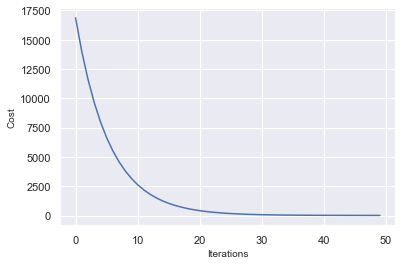

In [96]:
cost_function = np.vstack(cost_list)
#plt.title('Cost Function', sixe=20)
plt.xlabel('Iterations', size=10)
plt.ylabel('Cost', size=10)
plt.plot(cost_function)
plt.show()

In [101]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.00001,iterations=50):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = 1
    theta = np.ones([8,1])
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [103]:
theta,cost_history = stocashtic_gradient_descent(X,y,w_0,learning_rate,iterations)

NameError: name 'cal_cost' is not defined

In [87]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [88]:
def gradient_descent(X,y,theta,learning_rate=0.001,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [89]:

lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

ValueError: shapes (9357,11) and (2,1) not aligned: 11 (dim 1) != 2 (dim 0)